In [47]:
import os
import pandas as pd


In [48]:
path_data = os.getcwd()+os.sep+'data'+os.sep
ppi_names_full_score = pd.read_csv(path_data+'ppi_names_full_score.csv', index_col=0)
print('lenght rows:', len(ppi_names_full_score))
ppi_names_full_score.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


lenght rows: 11938498


,protein1,protein2,neighborhood,fusion,cooccurence,coexpression,experimental,database,combined_score
0,ARF5,PDE1C,0,0,0,54,0,0,155
1,ARF5,PAK2,0,0,0,0,180,0,197
2,ARF5,RAB36,0,0,0,62,152,0,222
3,ARF5,RAPGEF1,0,0,0,0,161,0,181
4,ARF5,SUMO3,0,0,0,82,213,0,270


neighborhood
AxesSubplot(0.125,0.125;0.775x0.755)


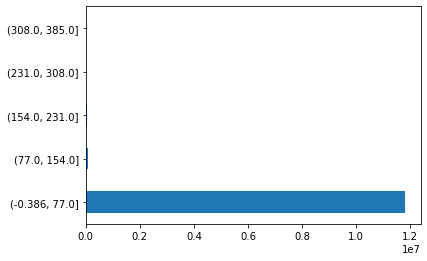


fusion
AxesSubplot(0.125,0.125;0.775x0.755)


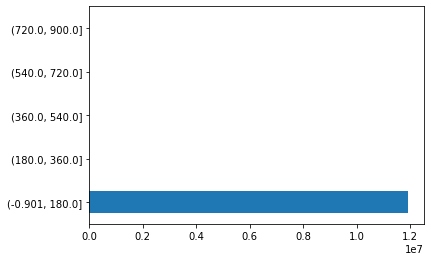


cooccurence
AxesSubplot(0.125,0.125;0.775x0.755)


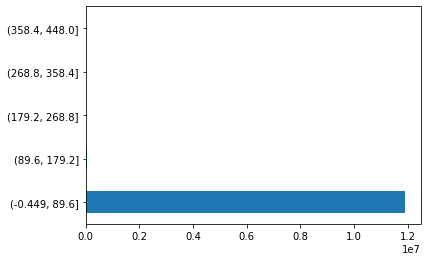


coexpression
AxesSubplot(0.125,0.125;0.775x0.755)


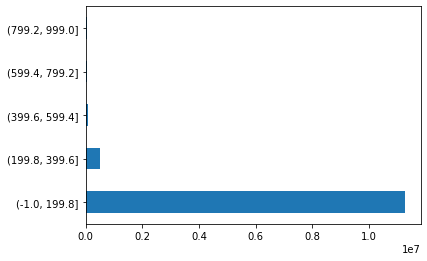


experimental
AxesSubplot(0.125,0.125;0.775x0.755)


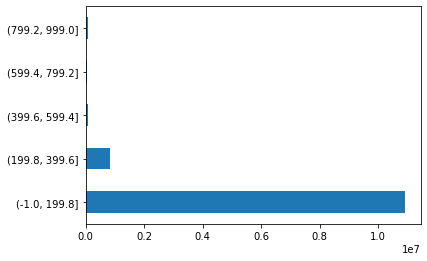


database
AxesSubplot(0.125,0.125;0.775x0.755)


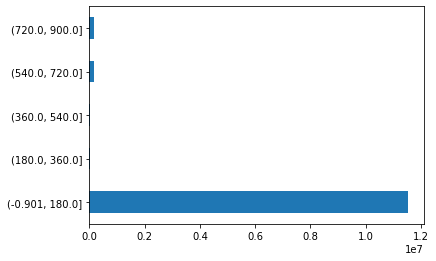


combined_score
AxesSubplot(0.125,0.125;0.775x0.755)


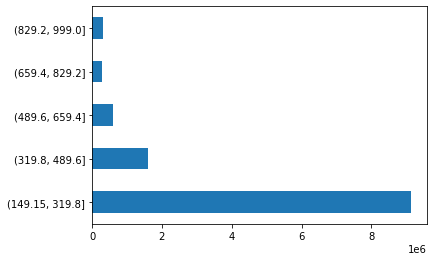

In [49]:
import matplotlib.pyplot as plt
score_list = ['neighborhood', 'fusion', 'cooccurence', 'coexpression', 'experimental', 'database', 'combined_score']
for s in score_list:
    print(s)
    plt.figure()
    print(ppi_names_full_score[s].value_counts(bins=5,sort=False).plot(kind='barh'))
    plt.show()
    print()

In [50]:
import matplotlib.pyplot as plt
score_list = ['neighborhood', 'fusion', 'cooccurence', 'coexpression', 'experimental', 'database', 'combined_score']
for s in score_list:
    print(s)
    print(ppi_names_full_score[s].value_counts(bins=5,sort=False))
    print()

neighborhood
(-0.386, 77.0]    11785162
(77.0, 154.0]        75908
(154.0, 231.0]       64322
(231.0, 308.0]       11038
(308.0, 385.0]        2068
Name: neighborhood, dtype: int64

fusion
(-0.901, 180.0]    11934374
(180.0, 360.0]         2522
(360.0, 540.0]          886
(540.0, 720.0]          624
(720.0, 900.0]           92
Name: fusion, dtype: int64

cooccurence
(-0.449, 89.6]    11883052
(89.6, 179.2]        33974
(179.2, 268.8]       14656
(268.8, 358.4]        4596
(358.4, 448.0]        2220
Name: cooccurence, dtype: int64

coexpression
(-1.0, 199.8]     11266846
(199.8, 399.6]      513378
(399.6, 599.4]       80422
(599.4, 799.2]       40520
(799.2, 999.0]       37332
Name: coexpression, dtype: int64

experimental
(-1.0, 199.8]     10897520
(199.8, 399.6]      834414
(399.6, 599.4]       75110
(599.4, 799.2]       58700
(799.2, 999.0]       72754
Name: experimental, dtype: int64

database
(-0.901, 180.0]    11537060
(180.0, 360.0]        14102
(360.0, 540.0]        35290
(540.0

In [51]:
list_full_protein = list(
    set(
        list(set(ppi_names_full_score['protein1']))+
        list(set(ppi_names_full_score['protein2']))
    )
)
print('lenght full proteins:',len(list_full_protein))

lenght full proteins: 19382


## choose score and tresholding

In [52]:
#'neighborhood', 'fusion', 'cooccurence', 'coexpression', 'experimental', 'database', 'combined_score'

score_name = 'combined_score'
treshold = 800

df_names_score = ppi_names_full_score[['protein1', 'protein2', score_name]]
df_names_score = df_names_score[df_names_score[score_name]>treshold]
print('numer rows',len(df_names_score))
df_names_score.head()

numer rows 357792


,protein1,protein2,combined_score
160,ARF5,ARFGAP3,877
187,ARF5,ARF1,969
401,ARF5,GORAB,914
565,ARF5,RAB28,936
944,ARF5,ASAP1,879


In [53]:
import numpy as np
percent = np.round((len(ppi_names_full_score[ppi_names_full_score[score_name]>treshold])*100)/len(ppi_names_full_score[score_name]),2)
print('Treshold',score_name,'>',treshold,'rapresent the',percent,'% of the ppi full dataset:')
print(len(ppi_names_full_score[ppi_names_full_score[score_name]>treshold]),'/',len(ppi_names_full_score[score_name]))

Treshold combined_score > 800 rapresent the 3.0 % of the ppi full dataset:
357792 / 11938498


In [54]:
curr_list_protein = list(
    set(
        list(set(df_names_score['protein1']))+
        list(set(df_names_score['protein2']))
    )
)
print('lenght proteins:',len(curr_list_protein))

lenght proteins: 14171


# open gene d.e. and gene target

In [55]:
import pickle

with open(path_data+"gene_de_intersection_list", "rb") as fp:   # Unpickling
    gene_de_intersection_list = pickle.load(fp)
gene_de_intersection_list = list(set(gene_de_intersection_list))
print(gene_de_intersection_list)
print('\nlenght gene d.e. :',len(gene_de_intersection_list))

['CRLF1', 'COL1A2', 'MXRA5', 'THY1', 'HTRA1', 'MT1H', 'SLPI', 'COL5A1', 'AQP1', 'TPPP3', 'TGFBI', 'BEX2', 'ASPN']

lenght gene d.e. : 13


In [56]:
f = open(path_data+"prioritization_targets_top5percent.txt", "r")
gene_target = f.read()
gene_target = gene_target.split("\n")
gene_target.remove('')
gene_target = list(set(gene_target))
print(gene_target)
print('\nlenght gene target :',len(gene_target))

['PDF', 'ABCC9', 'Bact mrcA', 'PTGS1', 'TBXA2R', 'PPARG', 'SLC46A1', 'PRKACA', 'PRKCA', 'CYP19A1', 'ESR1', 'SCN5A', 'CACNA1G', 'GRIN1', 'PDE4D', 'DRD2', 'F10', 'GABRG3', 'SLC19A1', 'PTGER2', 'GRIN2A', 'HRH1', 'ROCK1', 'ADORA3', 'LIPE', 'NQO2', 'GRIN2B', 'MTNR1A', 'PDE5A', 'SLC6A2', 'Stap-coc pbp2', 'ABCC8', 'PTGS2', 'GABBR2', 'HSV UL30', 'CHRM5', 'GABBR1', 'NR3C1']

lenght gene target : 38


In [57]:
set_gene_full = list(set(gene_de_intersection_list+gene_target))
len(set_gene_full)
print('lenght union gene d.e. and gene target :',len(set_gene_full))

lenght union gene d.e. and gene target : 51


In [58]:
print('finding proteing from union and not in ppi proteins\n')
k = 0
for name in set_gene_full:
    if name not in curr_list_protein:
        print(name,'absent')
        set_gene_full.remove(name)
        k+=1
print('\nNumber of absent proteins:',k)

finding proteing from union and not in ppi proteins

Bact mrcA absent
TPPP3 absent
GABRG3 absent
NQO2 absent
Stap-coc pbp2 absent
HSV UL30 absent
MXRA5 absent

Number of absent proteins: 7


## take protein near my gene target list by one step

In [59]:
import networkx as nx
import numpy as np

G=nx.Graph(name='Protein Interaction Graph')
interactions = df_names_score.values
for a,b,w in interactions:
    # w = float(w) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,int(1))]) # add weighted edge to graph

In [60]:
neighbors = []
for protein in gene_target:
    if protein in G.nodes():
        for neighbor in G.neighbors(protein):
            neighbors.append(neighbor)

neighbors = list(set(neighbors))
print(len(neighbors))
neighbors = [protein for protein in neighbors if protein not in set_gene_full]
print(len(neighbors))

1007
986


## modify dataframe interaction taking only union genes and neighbors

In [38]:
union_neighbors = set_gene_full + neighbors

In [39]:
bool_p1 = list(map(lambda x: (x in union_neighbors) , df_names_score['protein1']))
df_names_score_cropped = df_names_score[bool_p1]

In [40]:
bool_p2 = list(map(lambda x: (x in union_neighbors) , df_names_score_cropped['protein2']))
df_names_score_cropped = df_names_score_cropped[bool_p2]

In [41]:
print('len:',len(df_names_score_cropped))
df_names_score_cropped.head()

len: 27606


,protein1,protein2,combined_score
2100,FKBP4,DYNLL2,910
2169,FKBP4,MAPK1,909
2217,FKBP4,ACTR10,906
2320,FKBP4,HSP90AB1,977
2412,FKBP4,AR,992


# open dataset drugs - genes target

In [42]:
import pandas as pd

file_name = 'gene2drug_OA_UPandDN-corretto-TTD.xlsx'
df_drugs_gene = pd.read_excel(path_data+file_name)
df_drugs_gene = df_drugs_gene[['Drug','Targets']]
df_drugs_gene = df_drugs_gene.dropna()
print('df_drugs_gene columns :',df_drugs_gene.columns)
print('rows number :',len(df_drugs_gene))
df_drugs_gene.head()

df_drugs_gene columns : Index(['Drug', 'Targets'], dtype='object')
rows number : 566


,Drug,Targets
4,papaverine,"PDE5A, PDE4D"
5,pioglitazone,PPARG
7,mephenytoin,SCN5A
8,fulvestrant,ESR1
9,alprostadil,"TBXA2R, PTGER2"


## choose the maximum importance to be considered

In [43]:
max_importance = 50


df_drug_target_importance = []
for index in df_drugs_gene.index:
    if index > max_importance:
        break
    drug = df_drugs_gene[df_drugs_gene.index == index].values[0][0]
    targets = df_drugs_gene[df_drugs_gene.index == index].values[0][1].split(', ')
    for target in targets:
        df_drug_target_importance.append([drug,target,1])
    
df_drug_target_importance = pd.DataFrame(df_drug_target_importance, columns = ['drug', 'target','score'])
print('lenght:', len(df_drug_target_importance))
df_drug_target_importance.head()

lenght: 30


,drug,target,score
0,papaverine,PDE5A,1
1,papaverine,PDE4D,1
2,pioglitazone,PPARG,1
3,mephenytoin,SCN5A,1
4,fulvestrant,ESR1,1


In [44]:
# filtering considering only gene in union_neighbors
df_drug_target_importance = df_drug_target_importance[df_drug_target_importance['target'].isin(union_neighbors)]
print('lenght:', len(df_drug_target_importance))

lenght: 25


# build dataset ppi + drug protein interaction

In [45]:
df_drug_target_importance_new = df_drug_target_importance.copy()
df_drug_target_importance_new.columns = ['protein1', 'protein2', score_name]
df_drug_target_importance_new.columns

Index(['protein1', 'protein2', 'combined_score'], dtype='object')

In [46]:
concat = [df_names_score_cropped, df_drug_target_importance_new]

multiRelational = pd.concat(concat)

# plotting graph

In [24]:
import networkx as nx
import numpy as np

G=nx.Graph(name='Multi-relational Graph')
interactions = multiRelational.values
for a,b,w in interactions:
    # w = float(w) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,int(1))]) # add weighted edge to graph

In [25]:
print('number of nodes:',len(G.nodes()))
print('number of edges:',len(G.edges()))

number of nodes: 3540
number of edges: 105355


In [26]:
print(len(gene_target))
gene_target = [gene for gene in gene_target if gene in G.nodes()]
print(len(gene_target))

38
35


In [27]:
labels= {}
for node in G.nodes():
    labels[node]=node

In [28]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import networkx as nx

edgelist_drug_protein = [cuple for cuple in G.edges() if cuple[0] in df_drug_target_importance['drug'].unique() or cuple[1] in df_drug_target_importance['drug'].unique()]

#green: target
#blue: diff. exp.
#grey: neighbors
#yellow: drugs

def save_graph(graph, file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(15, 15), dpi=220)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    
    # plot node gene names
    nx.draw_networkx_nodes(graph,pos,labels,node_size=50)
    
    # plot node drugs node (shape = square, color = yellow)
    nx.draw_networkx_nodes(graph,pos,nodelist=df_drug_target_importance['drug'].unique(),node_shape='s',node_color='y', node_size=50)
    
    # plot node neighbors gene (gray)
    nx.draw_networkx_nodes(graph, pos, nodelist=neighbors, node_color='gray', node_size=50)
    
    # plot node target gene (green)
    nx.draw_networkx_nodes(graph, pos, nodelist=gene_target, node_color='g', node_size=50)
    
    # adjust node labels
    nx.draw_networkx_labels(graph,pos,labels,font_size=5,font_color='r')
    
    # plot edges
    nx.draw_networkx_edges(graph,pos)
    
    # plot edge drug-protein (color = yellow)
    nx.draw_networkx_edges(graph,pos,edge_color='y', edgelist = edgelist_drug_protein, arrowsize = 1)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

path_img = os.getcwd()+os.sep+'images_output'+os.sep
name = path_img+"graph_gde_and_target_and_neighbors_"+score_name+'_'+str(treshold)+'_'+'drugs_importance'+str(max_importance)+".pdf"
save_graph(G, name)


#!neato -V
#os.listdir(r'C:\Program Files\Graphviz\bin')
import os
import glob
paths = os.environ["PATH"]
#print(paths,'\n')
for path in paths.split(os.pathsep):
    print(path)
    match=glob.glob(os.path.join(path,'neato'))
    if match:
        print(match[0])



path = 'c:\ProgramData\Anaconda3\lib\site-packages'
match = glob.glob(os.path.join(path,'neato'))
if match:
    print(match[0])

import sys
#sys.path.append(match[0])
sys.path


path = 'c:\ProgramData\Anaconda3\lib\site-packages'
os.listdir(path)